In [1]:
import utils
import importlib
import Code_Models
import torch.nn as nn

import annimation_water_level

#from Code_Models import CNNRegressor, TransformerRegressor, GNN_FCNN_Regressor, Modele_Serie_Ameliore_Edge_Weight

# Recharger après modification
importlib.reload(utils)
importlib.reload(Code_Models)
importlib.reload(annimation_water_level)


Fin de complilation
pygame 2.6.1 (SDL 2.28.4, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html
Fin de complilation


<module 'annimation_water_level' from 'c:\\Users\\roumi\\OneDrive\\Bureau\\Projet_Stage\\annimation_water_level.py'>

In [2]:
# Hyperparameters
window_size = 14
batch_size = 32
epochs = 5
lr = 0.001

stations = ['Thanh My', 'Nong Son', 'Ai Nghia', 'Cau Lau', 'Giao Thuy', 'Hoi An', 'Hoi Khach']

#nom_station = stations[5]
#X_scaled,y_scaled,X_with_station,scaler_X,scaler_y,df = utils.traitement_donnes(nom_station,2010,2020)

# Pour CNN et Transformer
#train_loader,val_loader = utils.loader(X_scaled,y_scaled,batch_size=batch_size,window_size=window_size)
# Pour GNN et Serie
#train_loader_graphe,val_loader_graphe = utils.loader(X_with_station,y_scaled,batch_size=batch_size,window_size=window_size)

adj_matrix = utils.np.array([
    [0, 1, 0, 0, 0, 0, 0 ],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0,],
    [0, 0, 0, 0, 0, 1, 0,],
    [0, 0, 0, 0, 0, 0, 1,],
    [0, 0, 0, 0, 0, 0, 0,]
])


#adj_matrix = ((adj_matrix + adj_matrix.T) > 0).astype(int)

print(adj_matrix)
edge_index = utils.get_edge_index(adj_matrix)

distace_matrix = utils.get_distance_matrix(adj_matrix)

edge_weights = utils.create_edge_weights(distace_matrix, edge_index)

liste_models = [0,0,0,0]


[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]]
longitudes =  [107.833 107.919 108.104 108.033 108.127 108.279 108.365]
latitudes =  [15.767 15.827 15.874 15.7   15.839 15.86  15.87 ]


### FCNN

(4005, 13)
(4005, 1)
Modèle chargé depuis C:\Users\roumi\OneDrive\Bureau\Projet_Stage\Models\CNN\Model_CNN_Hoi Khach_epoch_50_30-05-2025_11-15-57.pt
Test Loss: 0.0005
Nombre des predictions =  399 Nombre de actuels 399

Evaluation Metrics:
MSE: 0.0770
RMSE: 0.2775
MAE: 0.1856
R² Score: 0.9738


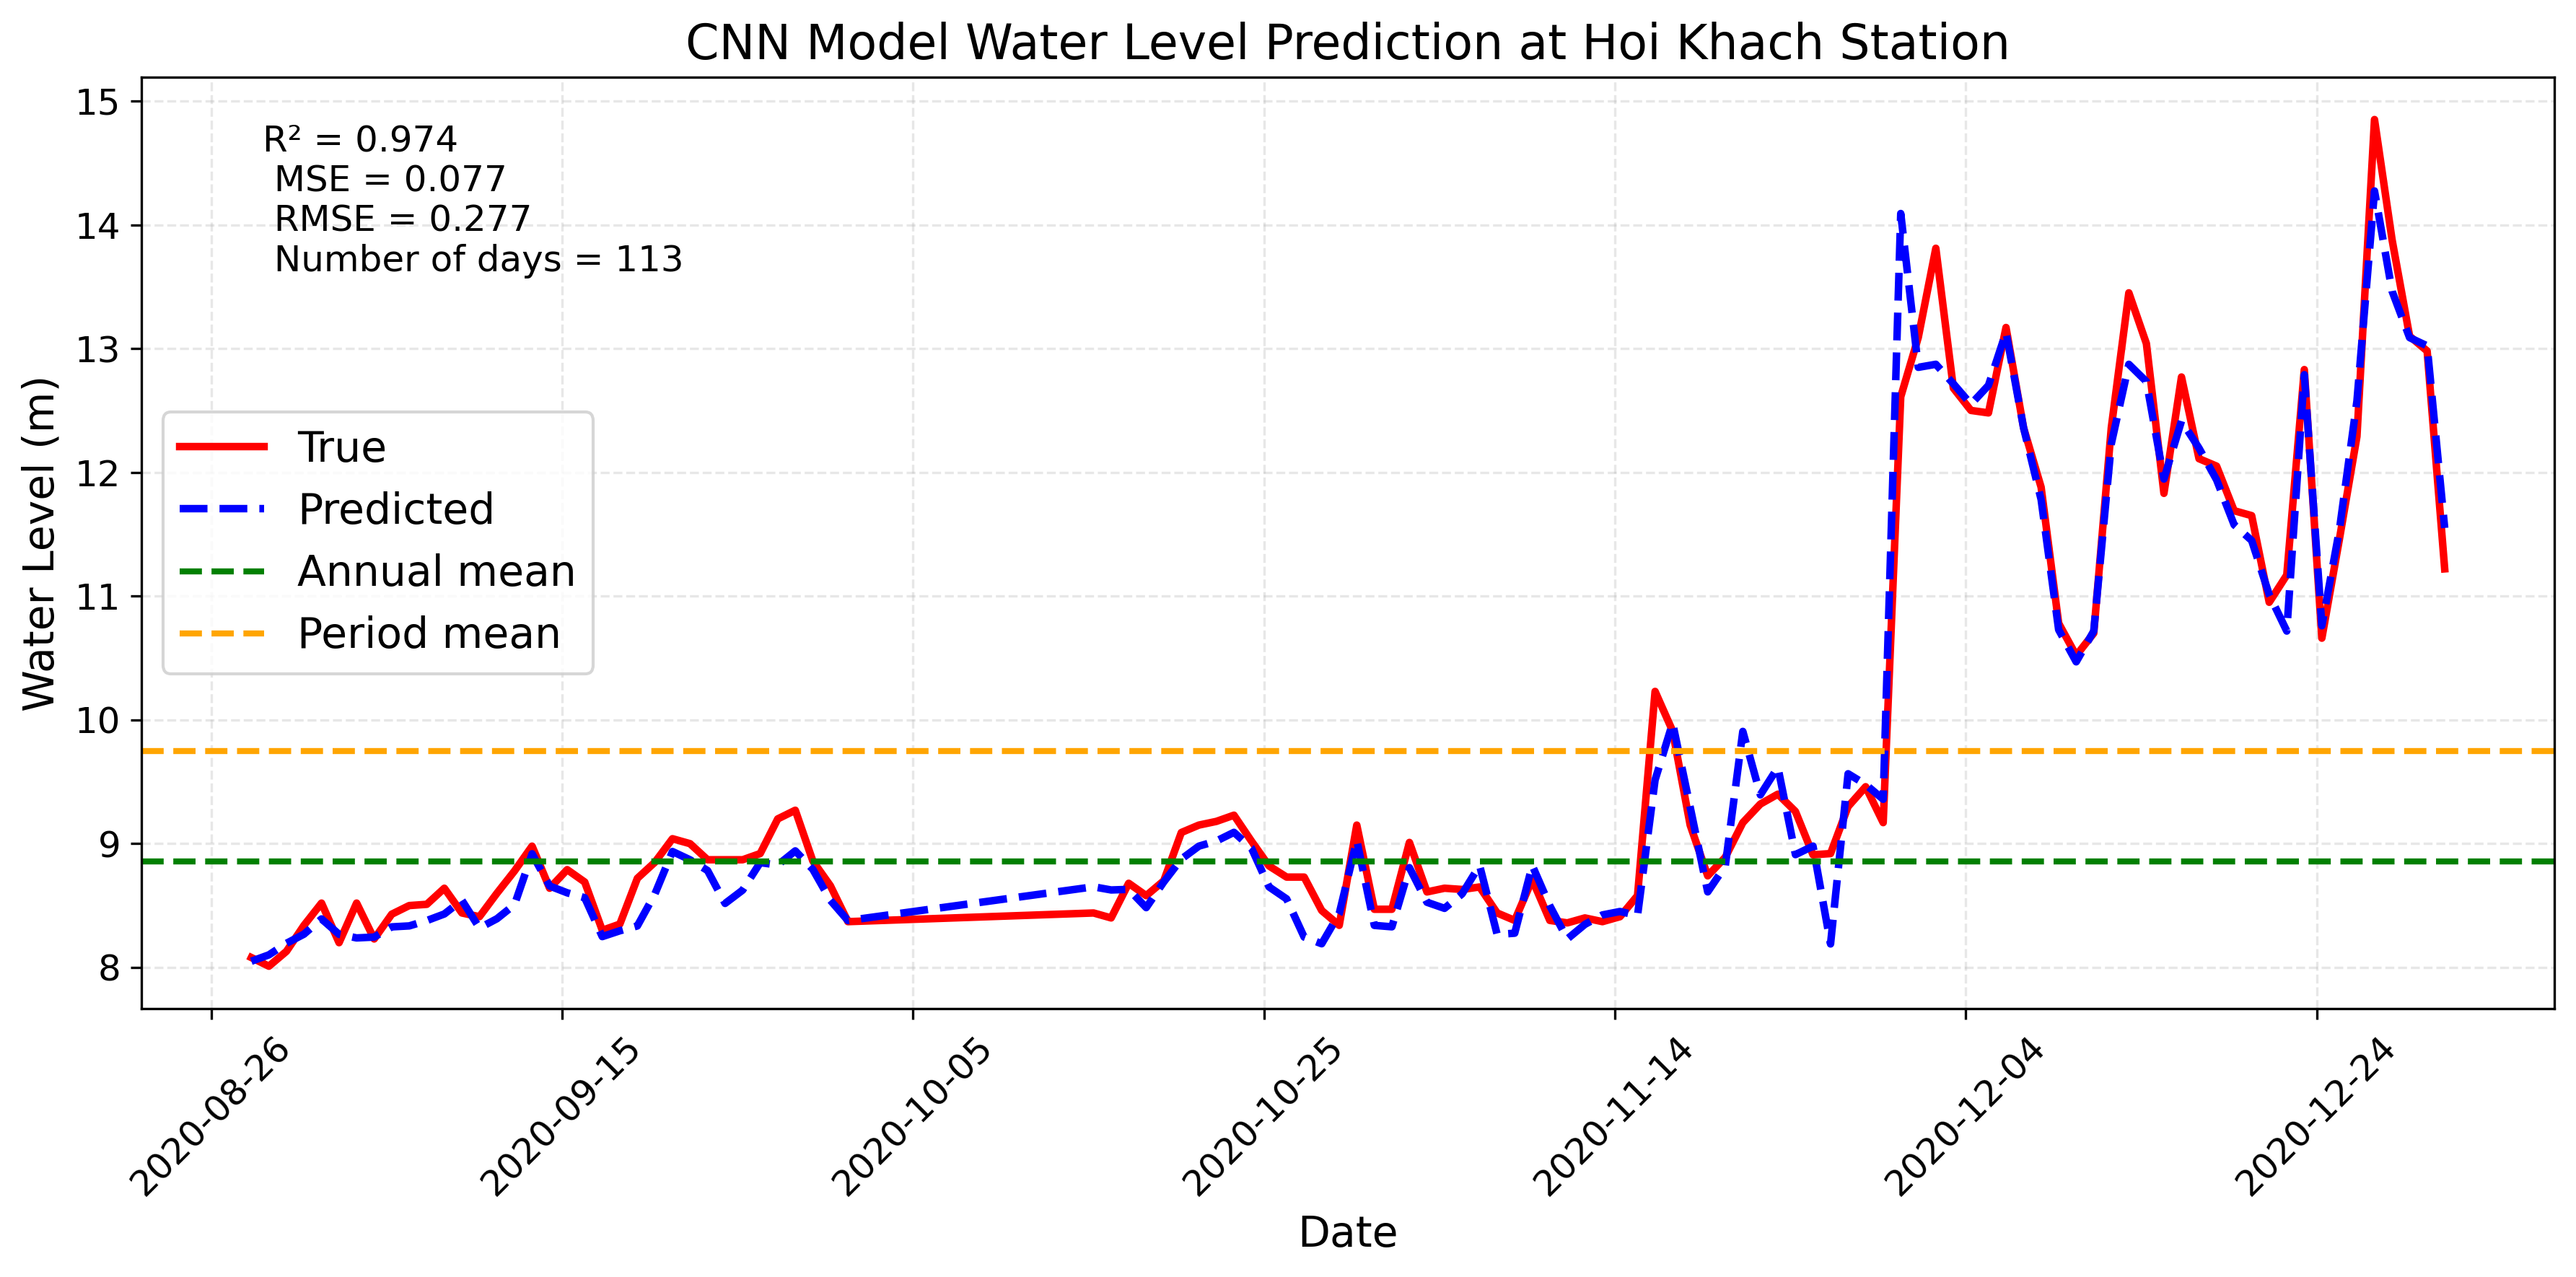

In [3]:
# Exécution
# Hyperparameters

window_size = 20
batch_size = 32
epochs = 100
lr = 0.001
date_start = 2010
date_end = 2020
month = 9
jours_afficher = 113
save = False

path = r"C:\Users\roumi\OneDrive\Bureau\Projet_Stage\Models\CNN\Model_CNN_Hoi Khach_epoch_50_30-05-2025_11-15-57.pt"
#path = None

nom_station = stations[6]
X_scaled,y_scaled,X_with_station,scaler_X,scaler_y,df = utils.traitement_donnes(nom_station,date_start,date_end)
print(X_scaled.shape)
print(y_scaled.shape)

train_loader,val_loader = utils.loader(X_scaled,y_scaled,batch_size=batch_size,window_size=window_size)

if __name__ == "__main__":
    # Model
    model_cnn = Code_Models.CNNRegressor(
    input_channels=X_scaled.shape[1],
    output_size=1,
    nom_station=nom_station,
    window_size=window_size
    )
    loss_fn = utils.nn.MSELoss()
    optimizer = utils.torch.optim.Adam(model_cnn.parameters(), lr=lr)
    
    model_cnn = utils.training_model(model=model_cnn,save=save,model_path=path,loss_fn=loss_fn,epochs=epochs,optimizer=optimizer,train_loader=train_loader)
    
    y_true,y_pred,dates,y_true_plot,y_plot_cnn,test_dates = utils.evaluate_model(model=model_cnn,save=save,year_end=date_end,loss_fn=loss_fn,month=month,jours_afficher=jours_afficher,val_loader=val_loader,scaler_y=scaler_y,df=df)
    
    #annimation_water_level.animation(y_true=y_true,y_pred=y_pred,dates=dates)
    
    liste_models[0] = model_cnn
    

### Chargement du modèle et evaluation

### Transfomer

c:\Users\roumi\anaconda3\envs\flood-env\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Modèle chargé depuis C:\Users\roumi\OneDrive\Bureau\Projet_Stage\Models\Transformer\Model_Transformer_Hoi Khach_epoch_50_30-05-2025_13-07-18.pt
Test Loss: 0.0009
Nombre des predictions =  399 Nombre de actuels 399

Evaluation Metrics:
MSE: 0.1472
RMSE: 0.3837
MAE: 0.2683
R² Score: 0.9499


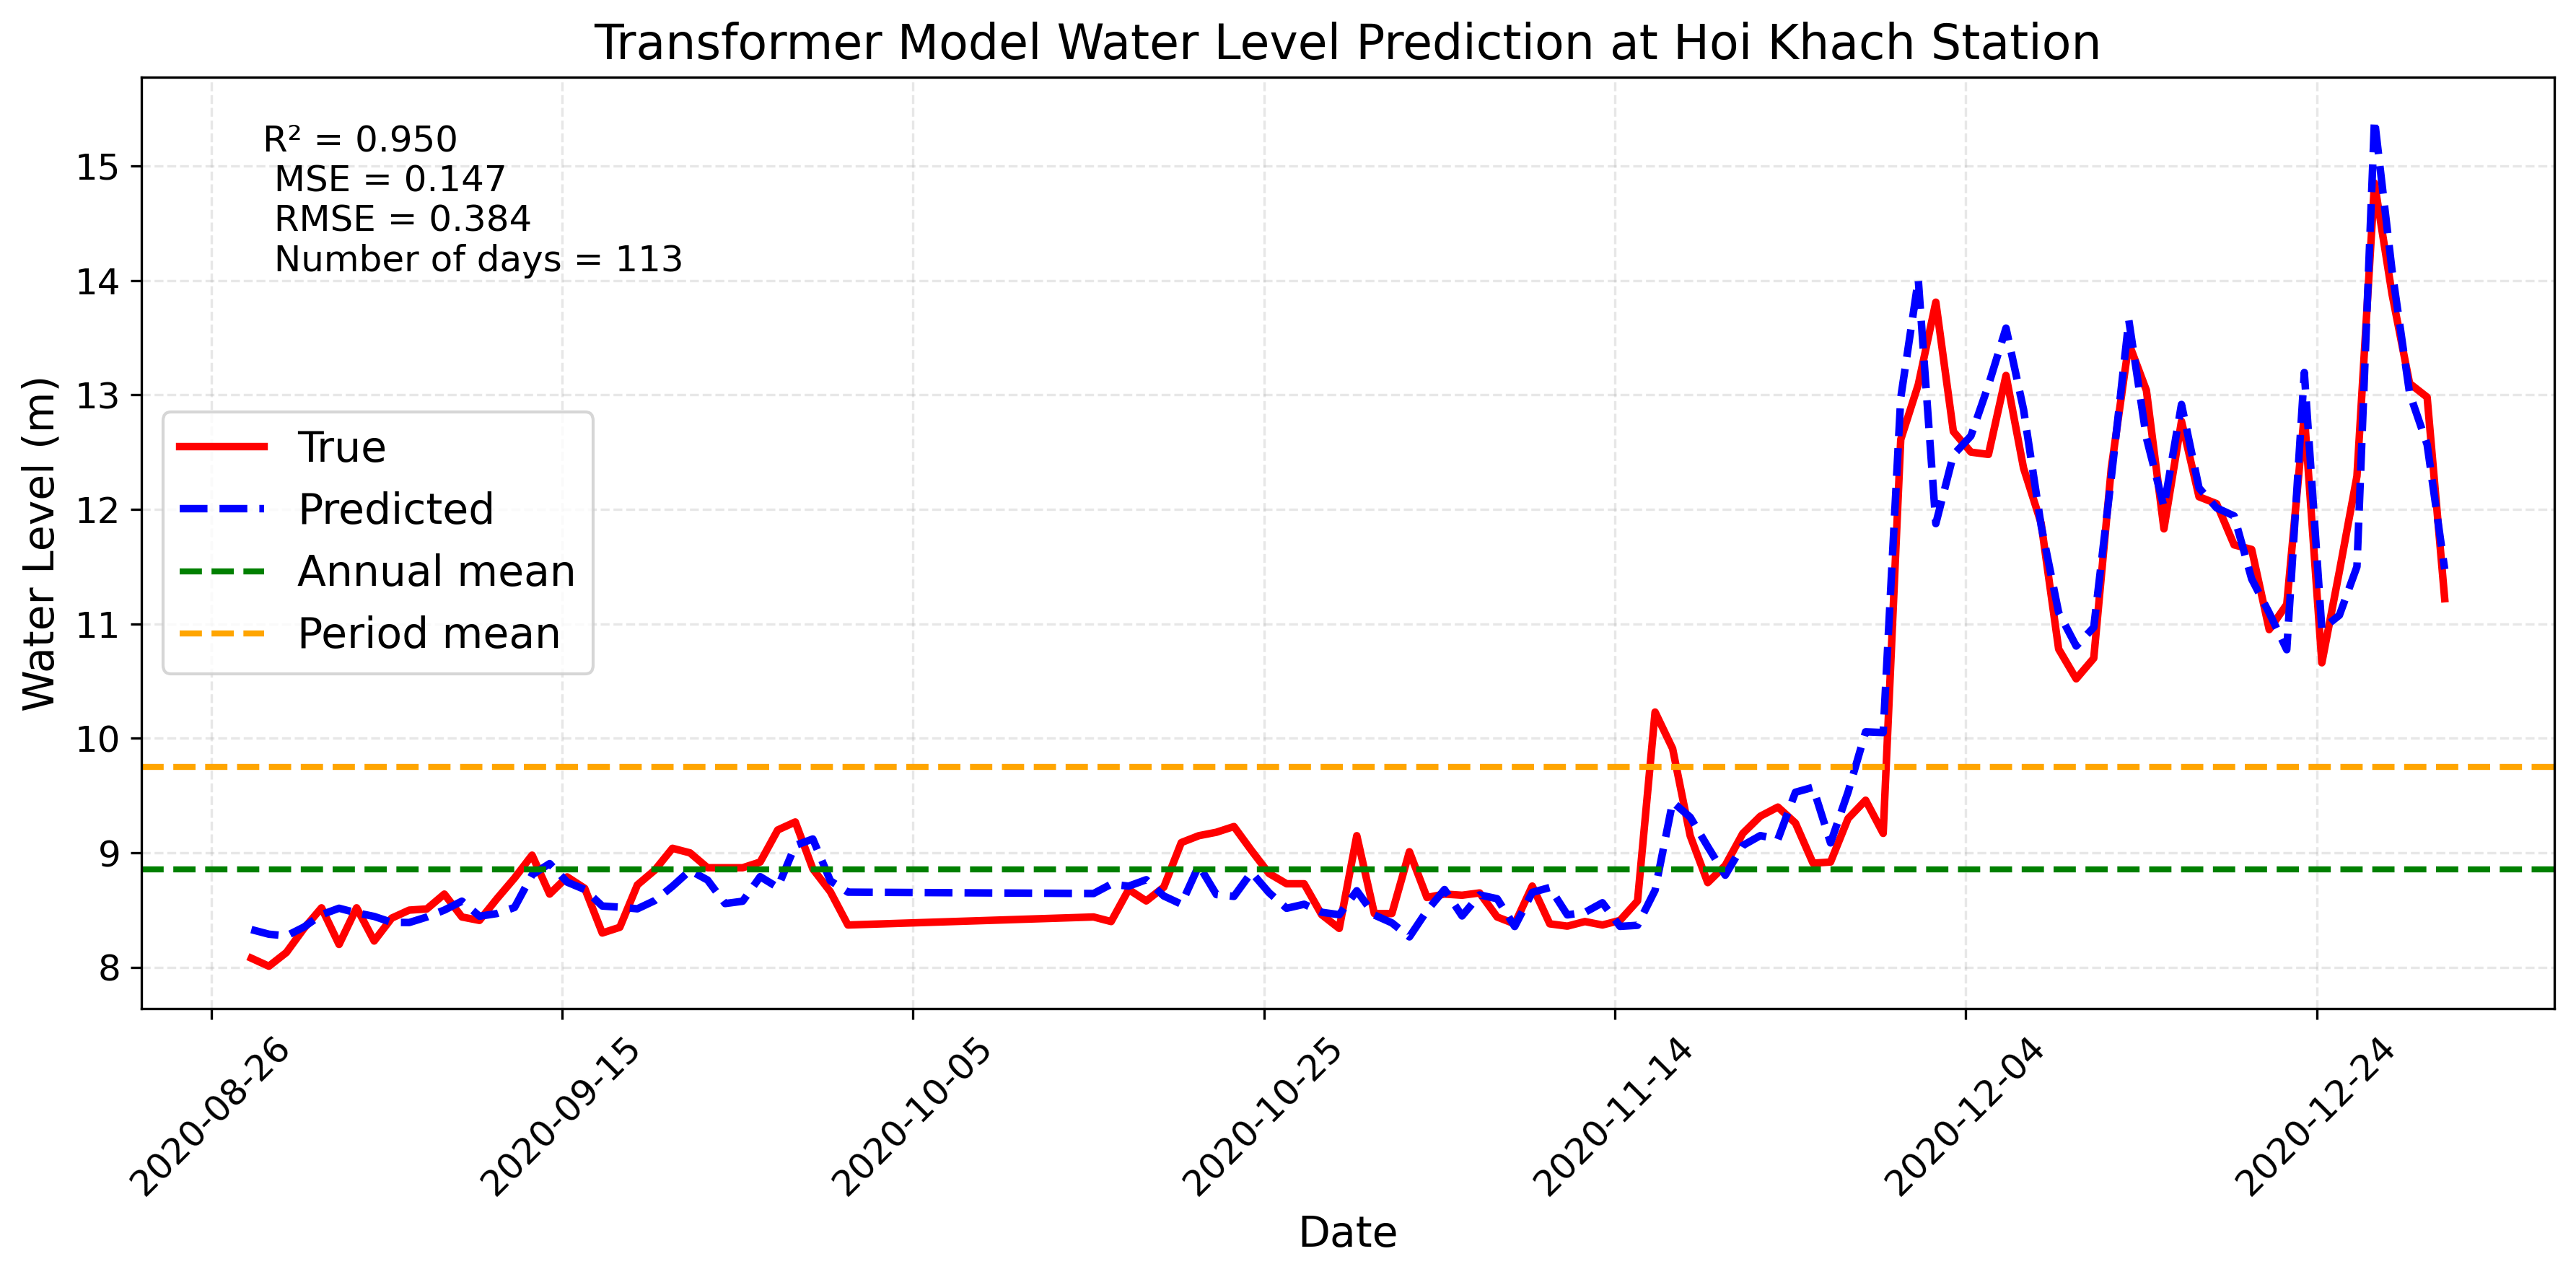

In [4]:
# Exécution

window_size = 20
batch_size = 32
epochs = 50
lr = 0.001
date_start = 2010
date_end = 2020
month = 9
jours_afficher = 113
save = False

path = r"C:\Users\roumi\OneDrive\Bureau\Projet_Stage\Models\Transformer\Model_Transformer_Hoi Khach_epoch_50_30-05-2025_13-07-18.pt"
#path = None
nom_station = stations[6]
X_scaled,y_scaled,X_with_station,scaler_X,scaler_y,df = utils.traitement_donnes(nom_station,date_start,date_end)
train_loader,val_loader = utils.loader(X_scaled,y_scaled,batch_size=batch_size,window_size=window_size)


if __name__ == "__main__":
    
    # Model, Loss, Optimizer
    model_tr = Code_Models.TransformerRegressor(
    input_dim=X_scaled.shape[1],
    model_dim=64,
    num_heads=4,
    num_layers=2,
    nom_station=nom_station,
    window_size=window_size
    )
    loss_fn = utils.nn.MSELoss()
    optimizer = utils.torch.optim.Adam(model_tr.parameters(), lr=lr)
    
    model = utils.training_model(model=model_tr,save=save,loss_fn=loss_fn,epochs=epochs,optimizer=optimizer,model_path=path,train_loader=train_loader)
    
    y_true,y_pred,dates,y_true_plot,y_plot_tr,test_dates = utils.evaluate_model(model=model_tr,loss_fn=loss_fn,save=save,year_end=date_end,month=month,jours_afficher=jours_afficher,val_loader=val_loader,scaler_y=scaler_y,df=df)
    #annimation_water_level.animation(y_true=y_true,y_pred=y_pred,dates=dates)
    liste_models[1] = model_tr

### GNN

Modèle chargé depuis C:\Users\roumi\OneDrive\Bureau\Projet_Stage\Models\GNN\Model_GNN_Hoi Khach_epoch_50_31-05-2025_11-40-01.pt


c:\Users\roumi\anaconda3\envs\flood-env\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test Loss: 0.1023
Nombre des predictions =  399 Nombre de actuels 399

Evaluation Metrics:
MSE: 0.6269
RMSE: 0.7918
MAE: 0.5498
R² Score: 0.7865


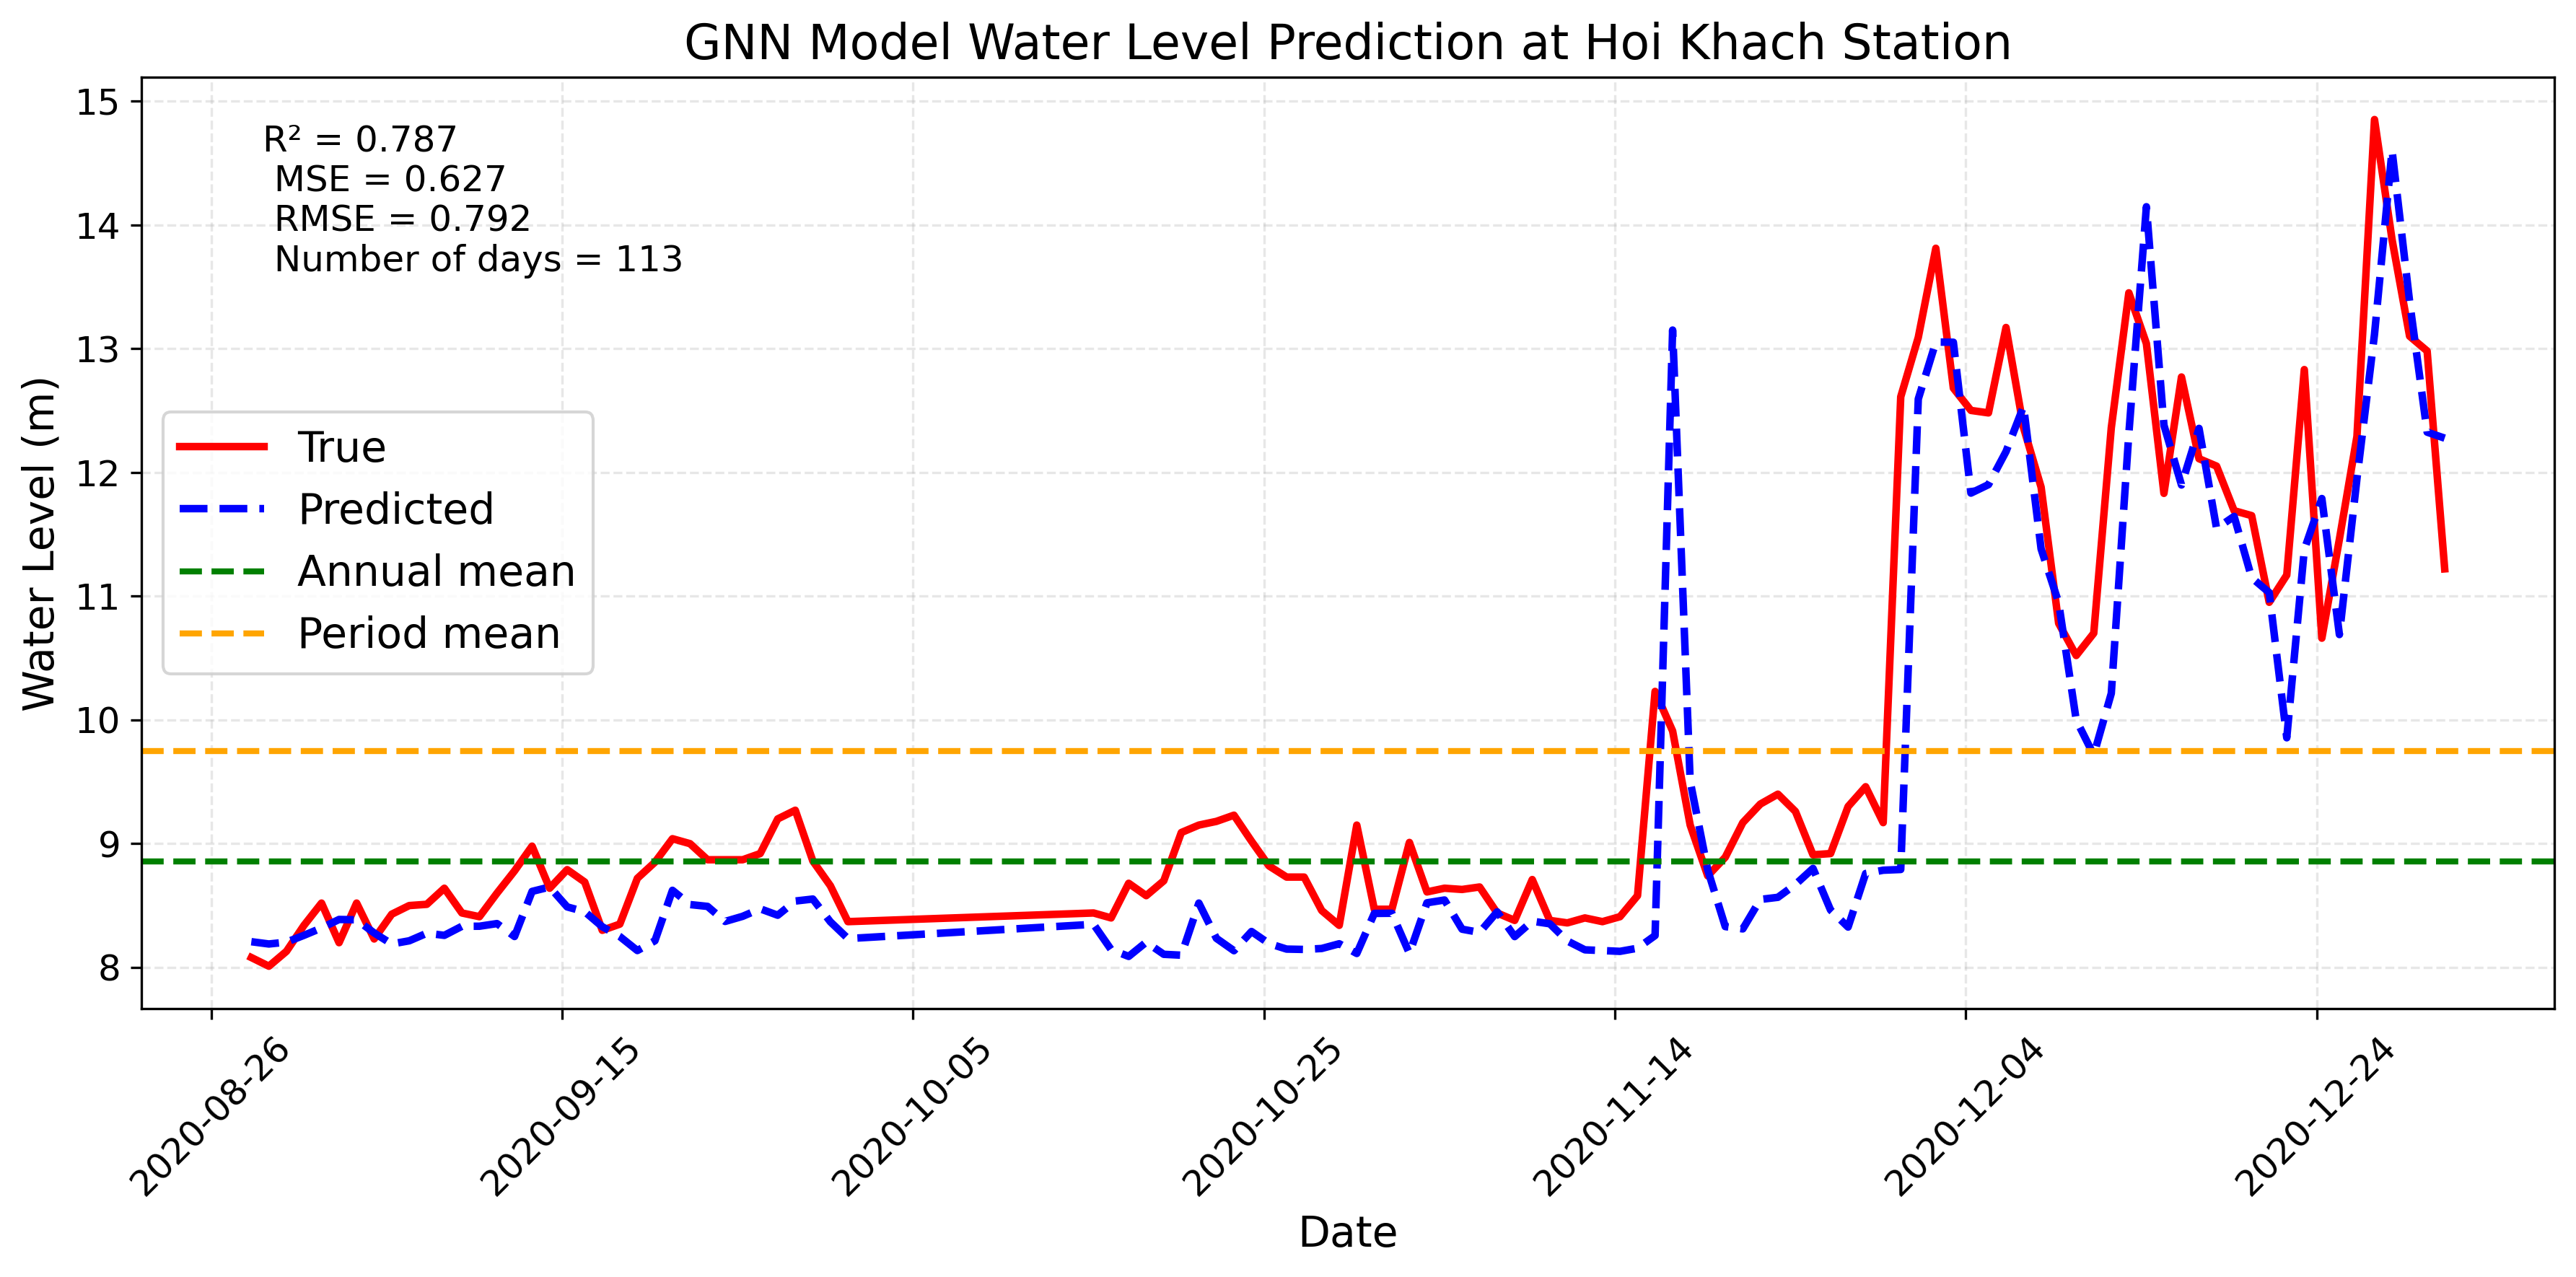

In [5]:
# Exécution

window_size = 20
batch_size = 32
epochs = 50
lr = 0.001
date_start = 2010
date_end = 2020

month = 9
jours_afficher = 113
save = False

nom_station = stations[6]
path =r"C:\Users\roumi\OneDrive\Bureau\Projet_Stage\Models\GNN\Model_GNN_Hoi Khach_epoch_50_31-05-2025_11-40-01.pt"
#path = None
X_scaled,y_scaled,X_with_station,scaler_X,scaler_y,df = utils.traitement_donnes(nom_station,date_start,date_end)
train_loader_graphe,val_loader_graphe = utils.loader(X_with_station,y_scaled,batch_size=batch_size,window_size=window_size)

if __name__ == "__main__":  
    # Model, Loss, Optimizer
    model = Code_Models.GNN_FCNN_Regressor(num_nodes=7, num_features=2,nom_station=nom_station)
    loss_fn = utils.nn.MSELoss()
    optimizer = utils.torch.optim.Adam(model.parameters(), lr=lr)
    
    model = utils.training_model(model=model,loss_fn=loss_fn,save=save,optimizer=optimizer,epochs=epochs,model_path=path,train_loader=train_loader_graphe,edge_index=edge_index,edge_weights=edge_weights)
    y_true,y_pred,dates,y_true_plot,y_plot_gnn,test_dates = utils.evaluate_model(model=model,loss_fn=loss_fn,save=save,year_end=date_end,month=month,jours_afficher=jours_afficher,val_loader=val_loader_graphe,scaler_y=scaler_y,df=df,edge_index=edge_index,edge_weights=edge_weights)
    #annimation_water_level.animation(y_true=y_true,y_pred=y_pred,dates=dates)
    liste_models[2] = model

### Model Serie


In [ ]:
# Exécution
epochs = 100
lr = 0.001
window_size = 20
batch_size = 32

date_start = 2010
date_end = 2020
month = 9
save = True
jours_afficher = 113


nom_station = stations[6]
path =r"Models/Model_Serie/Model_Model_Serie_Hoi Khach_epoch_100_05-06-2025_23-46-29.pt"
#path = None
X_scaled,y_scaled,X_with_station,scaler_X,scaler_y,df = utils.traitement_donnes(nom_station,date_start,date_end)
train_loader_graphe,val_loader_graphe = utils.loader(X_with_station,y_scaled,batch_size=batch_size,window_size=window_size)

if __name__ == "__main__":  
    # Model, Loss, Optimizer
    model = Code_Models.Modele_Serie_Ameliore_Edge_Weight(2,7,nom_station=nom_station)
    loss_fn = utils.nn.MSELoss()
    optimizer = utils.torch.optim.Adam(model.parameters(), lr=lr)
    
    model = utils.training_model(model=model,loss_fn=loss_fn,save=save,epochs=epochs,optimizer=optimizer,model_path=path,train_loader=train_loader_graphe,edge_index=edge_index,edge_weights=edge_weights)
    y_true,y_pred,dates,y_true_plot,y_plot_serie,test_dates = utils.evaluate_model(model=model,save=save,loss_fn=loss_fn,year_end=date_end,month=month,jours_afficher=jours_afficher,val_loader=val_loader_graphe,scaler_y=scaler_y,df=df,edge_index=edge_index,edge_weights=edge_weights)
    #annimation_water_level.animation(y_true=y_true,y_pred=y_pred,dates=dates)
    liste_models[3] = model

RuntimeError: Error(s) in loading state_dict for Modele_Serie_Ameliore_Edge_Weight:
	size mismatch for gcn1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for gcn1.lin.weight: copying a param with shape torch.Size([64, 64]) from checkpoint, the shape in current model is torch.Size([128, 64]).
	size mismatch for gcn2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for gcn2.lin.weight: copying a param with shape torch.Size([64, 64]) from checkpoint, the shape in current model is torch.Size([128, 128]).
	size mismatch for fc1.weight: copying a param with shape torch.Size([128, 448]) from checkpoint, the shape in current model is torch.Size([128, 896]).

### On evalue en même temps les différents modèles que nous avons constuit

Test Loss: 0.0007
Nombre des predictions =  400 Nombre de actuels 400

Evaluation Metrics:
MSE: 0.1598
RMSE: 0.3998
MAE: 0.2598
R² Score: 0.9329


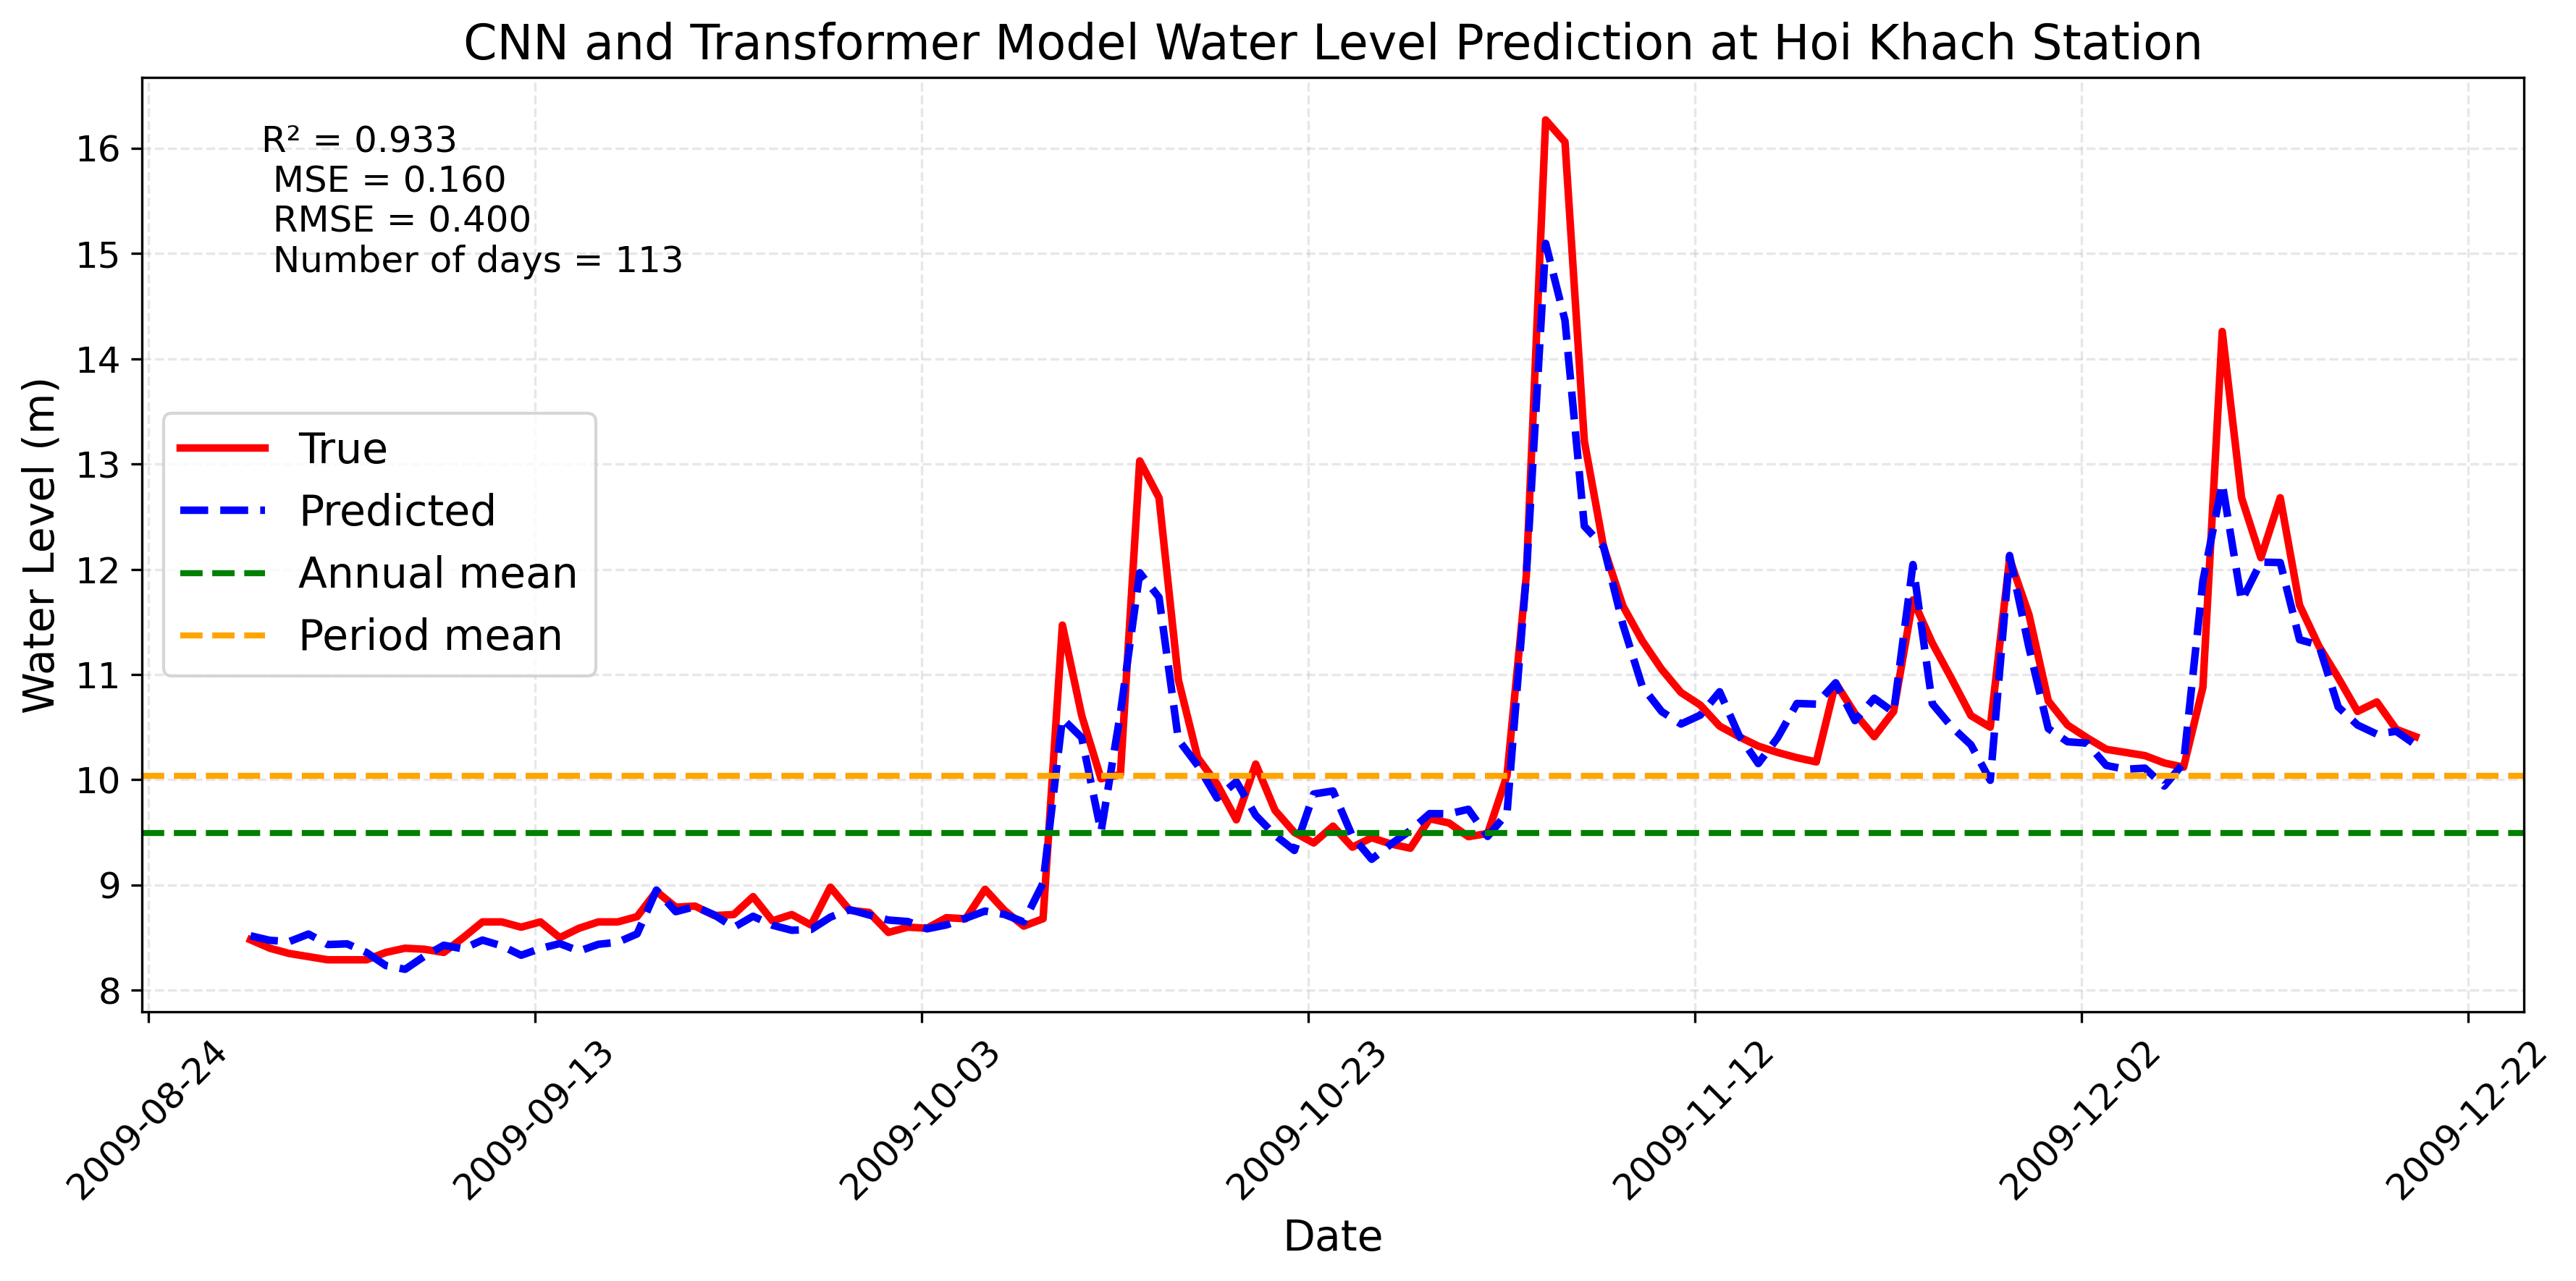

In [14]:
# Exécution
epochs = 50
lr = 0.001

date_start = 1999
date_end = 2009
month = 9
jours_afficher = 113
save = True
nom_station = stations[6]

loss_fn = utils.nn.MSELoss()
optimizer = utils.torch.optim.Adam(model_cnn.parameters(), lr=lr)

X_scaled,y_scaled,X_with_station,scaler_X,scaler_y,df = utils.traitement_donnes(nom_station=nom_station,year_start=date_start,year_end=date_end)
train_loader,val_loader = utils.loader(X_scaled,y_scaled,batch_size=batch_size,window_size=window_size)

utils.evaluate_combined(model_bas=model_cnn,seuil=0,model_haut=model_tr,year_end=date_end,save=save,loss_fn=loss_fn,val_loader=val_loader,scaler_y=scaler_y,df=df,month=month,jours_afficher=jours_afficher)

### PLOT GENERAL

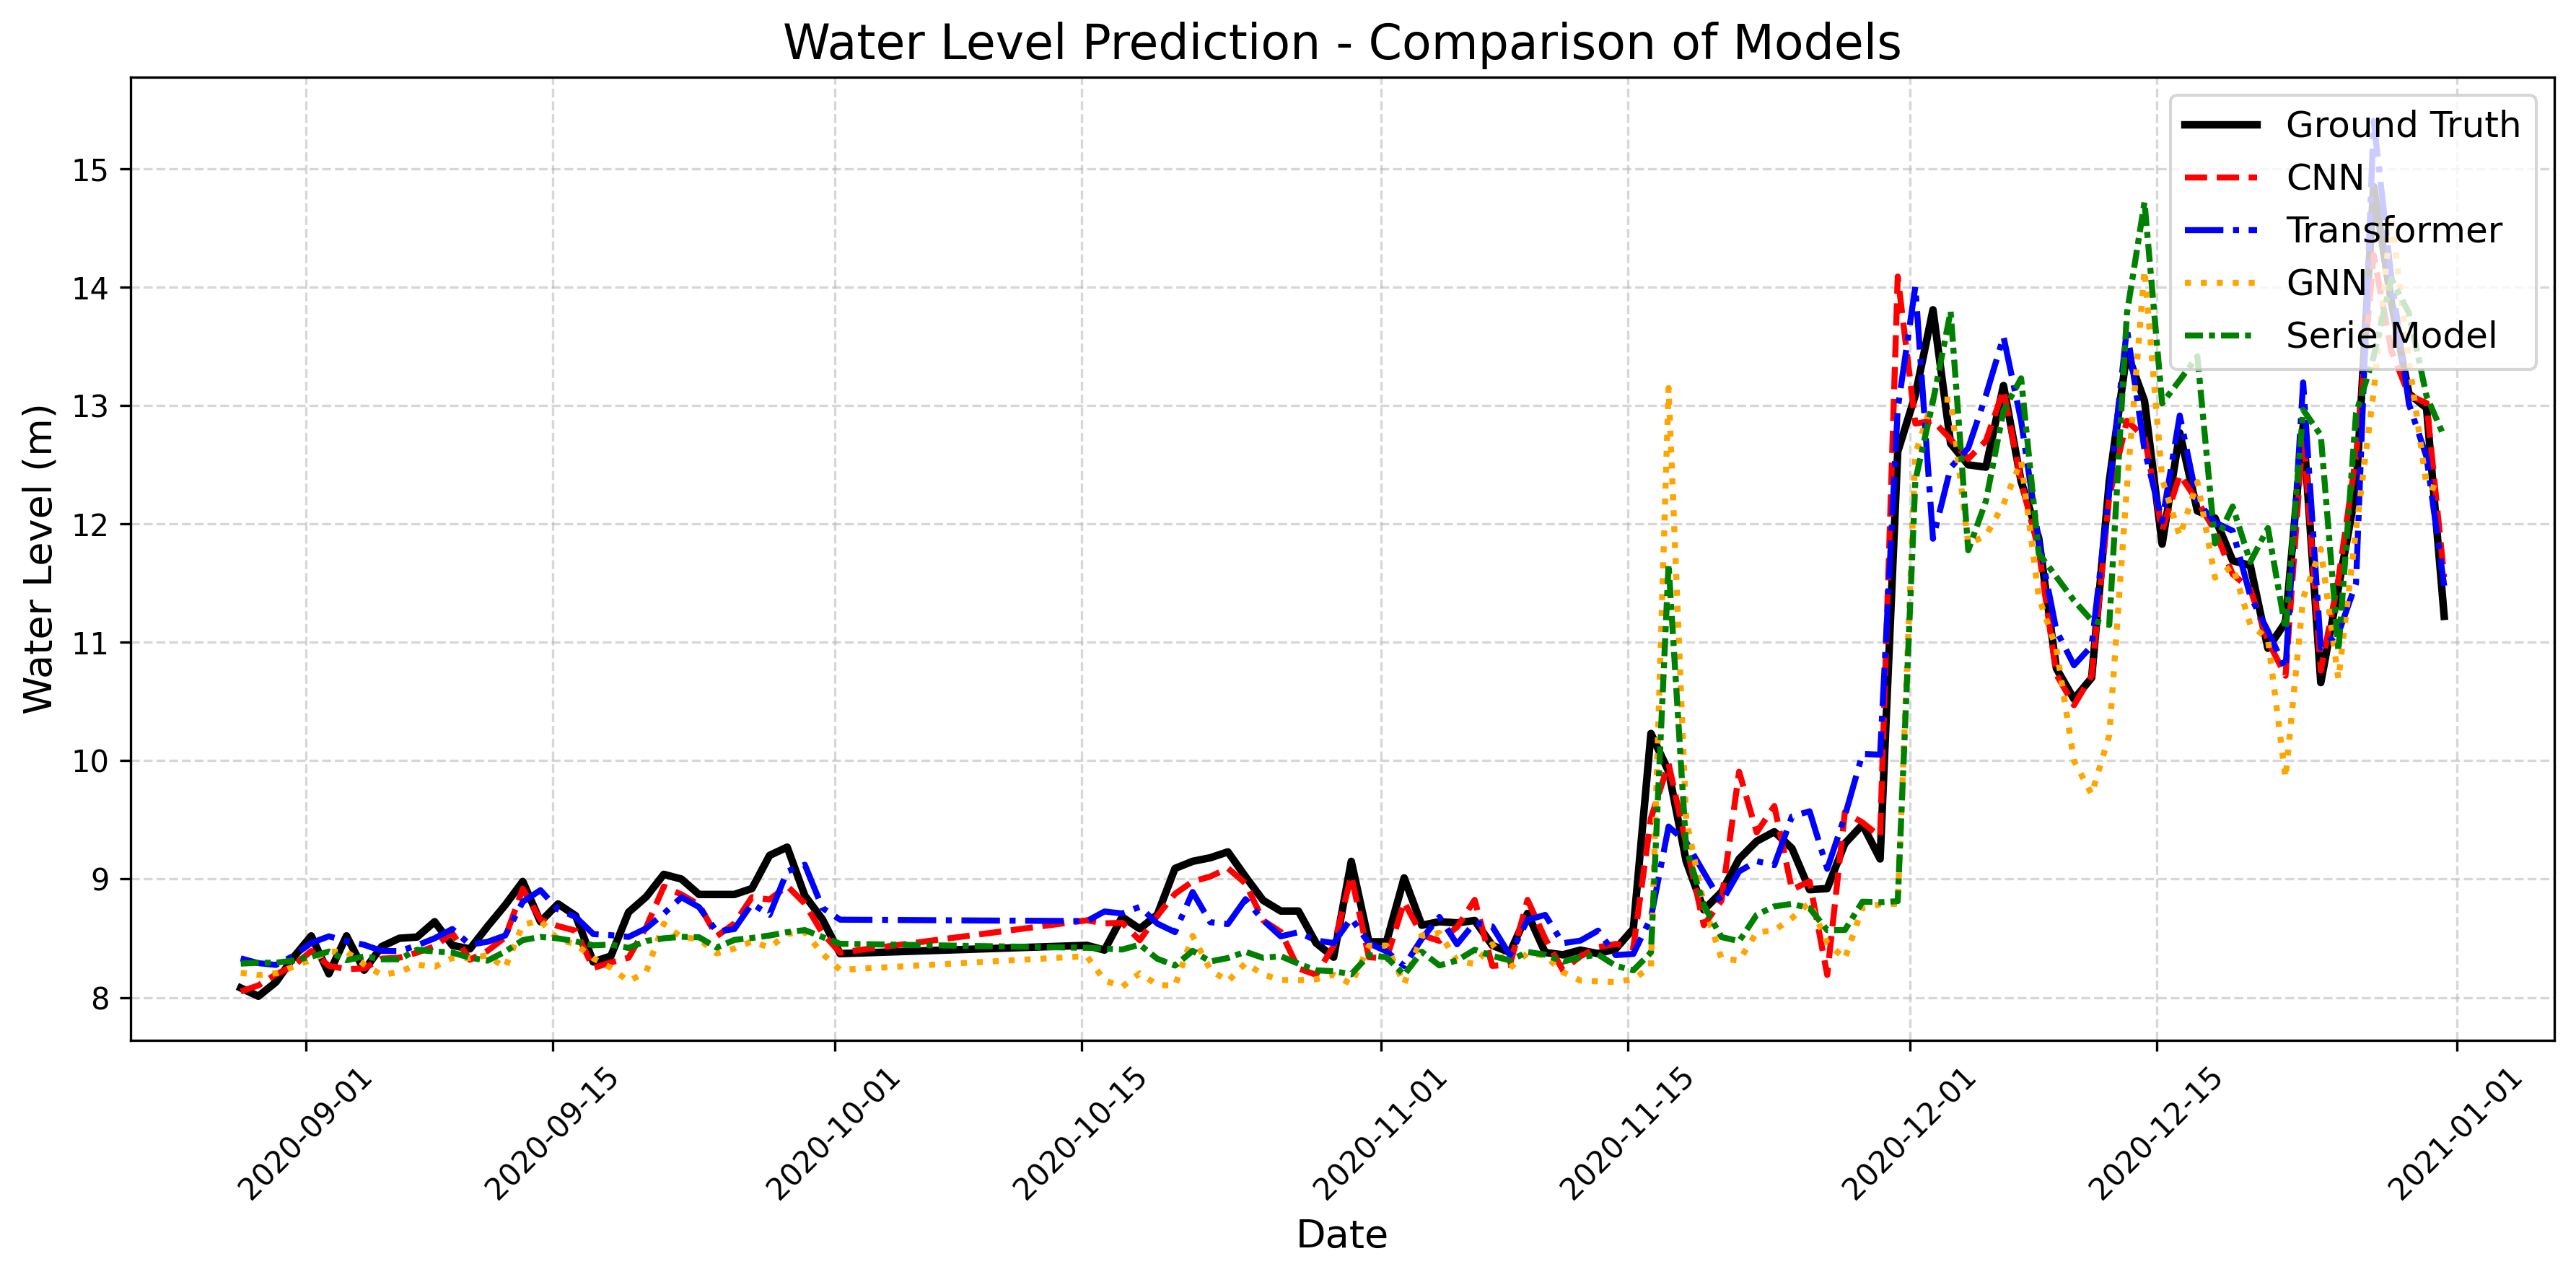

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=300)

# Tracé des courbes avec des styles de lignes différents
plt.plot(test_dates, y_true_plot, label='Ground Truth', color='black', linewidth=2.5, linestyle='-')
plt.plot(test_dates, y_plot_cnn, label='CNN', color='red', linewidth=2.0, linestyle='--')
plt.plot(test_dates, y_plot_tr, label='Transformer', color='blue', linewidth=2.0, linestyle='-.')
plt.plot(test_dates, y_plot_gnn, label='GNN', color='orange', linewidth=2.0, linestyle=':')
plt.plot(test_dates, y_plot_serie, label='Serie Model', color='green', linewidth=2.0, linestyle=(0, (3, 1, 1, 1)))  # custom dash-dot-dot

# Titre et axes
plt.title("Water Level Prediction - Comparison of Models", fontsize=16)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Water Level (m)", fontsize=13)

# Amélioration de l'affichage
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage
plt.show()

# Sauvegarde (optionnelle)
# plt.savefig("water_level_comparison.png", dpi=300)


### Résumée des models

RuntimeError: Given groups=1, weight of size [64, 13, 3], expected input[2, 14, 13] to have 13 channels, but got 14 channels instead